In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statannotations.Annotator import Annotator
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
coloc_region = pd.read_csv('./EuHetChrom_Rep1/220221_exp4.38_CoLoc_UpdatedNuclei.csv')

In [3]:
#Filter nuclei based on shape and number of red/green objects, by percentiles
coloc_region_filtered = coloc_region.loc[
    (coloc_region['Children_RedObjects_Count'] > coloc_region.quantile(q = 0.2, axis = 0)['Children_RedObjects_Count']) &
    (coloc_region['Children_RedObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_RedObjects_Count']) &
    (coloc_region['Children_GreenObjects_Count'] > coloc_region.quantile(q = 0.1, axis = 0)['Children_GreenObjects_Count']) &
    (coloc_region['Children_GreenObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_GreenObjects_Count']) &
    (coloc_region['AreaShape_Compactness'] < coloc_region.quantile(q = 0.9, axis = 0)['AreaShape_Compactness']) &
    (coloc_region['AreaShape_Solidity'] > coloc_region.quantile(q = 0.1, axis = 0)['AreaShape_Solidity'])]

/Users/hildebre1/miniconda/envs/image-analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [4]:
#keep the largest area of each object
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

coloc_region_filtered_max_area = coloc_region_filtered.loc[coloc_region_filtered.groupby(
    ['Metadata_FullImageName', 'Metadata_Series', 'TrackObjects_Label_100'])["AreaShape_Area"].idxmax()]

In [5]:
coloc_region_filtered_max_area

,ImageNumber,ObjectNumber,Metadata_C,Metadata_ChannelName,Metadata_ColorFormat,Metadata_Date,Metadata_ExpNum,Metadata_FileLocation,Metadata_Frame,Metadata_FullImageName,...,TrackObjects_DistanceTraveled_100,TrackObjects_FinalAge_100,TrackObjects_IntegratedDistance_100,TrackObjects_Label_100,TrackObjects_Lifetime_100,TrackObjects_Linearity_100,TrackObjects_ParentImageNumber_100,TrackObjects_ParentObjectNumber_100,TrackObjects_TrajectoryX_100,TrackObjects_TrajectoryY_100
0,3,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_001,...,0.000000,NaN,0.000000,1,1.0,NaN,0.0,0,0.000000,0.000000
6,5,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_001,...,8.487983,NaN,10.509894,3,3.0,0.946930,4.0,2,5.190485,-6.716005
19,17,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_002,...,2.697086,NaN,7.718389,1,3.0,0.792977,16.0,1,-2.612803,0.668981
35,30,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_003,...,6.020774,NaN,26.090095,1,5.0,0.522747,29.0,2,1.628186,5.796441
34,30,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide10_newsettings_003,...,6.487599,NaN,24.783539,2,5.0,0.315875,29.0,1,6.312946,1.495208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,931,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_009,...,5.107399,NaN,26.460054,1,5.0,0.965338,930.0,1,3.703853,3.516674
1382,931,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_009,...,4.463047,NaN,45.190584,3,4.0,0.787145,930.0,2,-2.756759,3.509854
1399,943,1,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_010,...,8.076929,NaN,21.239457,1,4.0,0.810755,942.0,1,6.845711,4.286375
1397,942,2,NaN,NaN,monochrome,200903,4.38,file:/Users/hildebre1/Dropbox%20%28UMass%20Med...,NaN,200903_exp4.38_slide6_newsettings_010,...,4.789488,NaN,12.080408,2,3.0,0.958456,941.0,2,-0.445544,-4.768719


In [6]:
#list(coloc_region_filtered_max_area.columns)

In [7]:
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 5,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 6,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 10,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 11,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 13,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 14,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 16,'Sample'] = 't8 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 17,'Sample'] = 't8 ICRF-193'

In [8]:
coloc_region_filtered_max_area = coloc_region_filtered_max_area[coloc_region_filtered_max_area['Sample'].isin(['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])].reset_index(drop = True)

In [9]:
coloc_region_filtered_max_area['Replicate'] = 'R1'

In [10]:
coloc_region_filtered_max_area['ColocAreaFraction'] = coloc_region_filtered_max_area['Math_CArea_ByNuclei']/coloc_region_filtered_max_area['AreaShape_Area']

In [11]:
coloc_region_filtered_max_area['RedColocCountFraction'] = coloc_region_filtered_max_area['Children_CORed_Count']/coloc_region_filtered_max_area['Children_RedObjects_Count']

In [12]:
coloc_region_filtered_max_area.to_csv('./EuHetChrom_Rep1/220228_EuHetOverlap_RadialDist_exp4.38_data_R1.csv', index = False)

In [13]:
coloc_region = pd.read_csv('./EuHetChrom_Rep2/220221_exp4.43_CoLoc_UpdatedNuclei.csv')

In [14]:
#Filter nuclei based on shape and number of red/green objects, by percentiles
coloc_region_filtered = coloc_region.loc[(coloc_region['Children_RedObjects_Count'] > coloc_region.quantile(q = 0.2, axis = 0)['Children_RedObjects_Count']) &
                                                  (coloc_region['Children_RedObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_RedObjects_Count']) &
                                                  (coloc_region['Children_GreenObjects_Count'] > coloc_region.quantile(q = 0.1, axis = 0)['Children_GreenObjects_Count']) &
                                                  (coloc_region['Children_GreenObjects_Count'] < coloc_region.quantile(q = 0.9, axis = 0)['Children_GreenObjects_Count']) &
                                                  (coloc_region['AreaShape_Compactness'] < coloc_region.quantile(q = 0.9, axis = 0)['AreaShape_Compactness']) &
                                                  (coloc_region['AreaShape_Solidity'] > coloc_region.quantile(q = 0.1, axis = 0)['AreaShape_Solidity'])]

/Users/hildebre1/miniconda/envs/image-analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [15]:
#keep the largest area of each object
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

coloc_region_filtered_max_area = coloc_region_filtered.loc[coloc_region_filtered.groupby(['Metadata_FullImageName', 'Metadata_Series', 'TrackObjects_Label_100'])["AreaShape_Area"].idxmax()]

In [16]:
#list(coloc_region_filtered_max_area.columns)

In [17]:
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 9,'Sample'] = 't4 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 12,'Sample'] = 't4 ICRF-193'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 15,'Sample'] = 't8 DMSO'
coloc_region_filtered_max_area.loc[coloc_region_filtered_max_area['Metadata_SlideNum'] == 18,'Sample'] = 't8 ICRF-193'

In [18]:
coloc_region_filtered_max_area = coloc_region_filtered_max_area[coloc_region_filtered_max_area['Sample'].isin(['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'])].reset_index(drop = True)

In [19]:
coloc_region_filtered_max_area['Replicate'] = 'R2'

In [20]:
coloc_region_filtered_max_area['ColocAreaFraction'] = coloc_region_filtered_max_area['Math_CArea_ByNuclei']/coloc_region_filtered_max_area['AreaShape_Area']

In [21]:
coloc_region_filtered_max_area['RedColocCountFraction'] = coloc_region_filtered_max_area['Children_CORed_Count']/coloc_region_filtered_max_area['Children_RedObjects_Count']

In [22]:
coloc_region_filtered_max_area.to_csv('./EuHetChrom_Rep2/220228_EuHetOverlap_RadialDist_exp4.43_data_R2.csv', index = False)

In [96]:
rep1 = pd.read_csv('./EuHetChrom_Rep1/220221_EuHetOverlap_RadialDist_exp4.38_data_R1.csv')
rep2 = pd.read_csv('./EuHetChrom_Rep2/220221_EuHetOverlap_RadialDist_exp4.43_data_R2.csv')

In [97]:
#list(rep1.columns)

In [98]:
rep1 = rep1[[
 'Sample',
 'Replicate',
 'Math_RedColocAreaFraction_ByNuclei',
 'Math_RedColocObjectAreaFraction_ByNuclei',
 'Math_CArea_ByNuclei',
 'AreaShape_Area',
 'ColocAreaFraction',
 'RedColocCountFraction',
 'Math_GreenObjectsWithRedChildrenFraction',
 'Math_RedObjectsWithGreenChildrenFraction',
 'Children_GreenObjects_Count',
 'Mean_GreenObjects_AreaShape_Area',
 'Metadata_FullImageName',
 'Metadata_Z',
 'Number_Object_Number']]

In [99]:
rep2 = rep2[[
 'Sample',
 'Replicate',
 'Math_RedColocAreaFraction_ByNuclei',
 'Math_RedColocObjectAreaFraction_ByNuclei',
 'Math_CArea_ByNuclei',
 'AreaShape_Area',
 'ColocAreaFraction',
 'RedColocCountFraction',
 'Math_GreenObjectsWithRedChildrenFraction',
 'Math_RedObjectsWithGreenChildrenFraction',
 'Children_GreenObjects_Count',
 'Mean_GreenObjects_AreaShape_Area',
 'Metadata_FullImageName',
 'Metadata_Z',
 'Number_Object_Number',]]

In [100]:
combo = rep1.append(rep2, ignore_index = True)

In [101]:
combo

,Sample,Replicate,Math_RedColocAreaFraction_ByNuclei,Math_RedColocObjectAreaFraction_ByNuclei,Math_CArea_ByNuclei,AreaShape_Area,ColocAreaFraction,RedColocCountFraction,Math_GreenObjectsWithRedChildrenFraction,Math_RedObjectsWithGreenChildrenFraction,Children_GreenObjects_Count,Mean_GreenObjects_AreaShape_Area,Metadata_FullImageName,Metadata_Z,Number_Object_Number
0,t4 ICRF-193,R1,0.130931,0.721880,298.0,9800,0.030408,0.555556,0.764706,0.361111,17,113.588235,200903_exp4.38_slide10_newsettings_001,2,1
1,t4 ICRF-193,R1,0.131636,0.728727,543.0,14603,0.037184,0.696970,0.900000,0.136364,10,399.800000,200903_exp4.38_slide10_newsettings_001,4,2
2,t4 ICRF-193,R1,0.143950,0.542748,527.0,13577,0.038816,0.508772,0.636364,0.122807,11,367.909091,200903_exp4.38_slide10_newsettings_002,5,1
3,t4 ICRF-193,R1,0.092523,0.340187,396.0,14467,0.027373,0.347826,0.727273,0.115942,11,319.454545,200903_exp4.38_slide10_newsettings_003,7,2
4,t4 ICRF-193,R1,0.118747,0.430753,451.0,13478,0.033462,0.370968,0.800000,0.225806,15,242.400000,200903_exp4.38_slide10_newsettings_003,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,t4 DMSO,R2,0.165397,0.671000,369.0,7004,0.052684,0.625000,0.777778,0.200000,9,272.777778,200921_exp4.43_changedOC_multipoint_slide9_001,5,2
349,t4 DMSO,R2,0.094220,0.541618,163.0,4859,0.033546,0.545455,0.500000,0.060606,4,365.500000,200921_exp4.43_changedOC_multipoint_slide9_001,3,3
350,t4 DMSO,R2,0.253977,0.707847,479.0,8320,0.057572,0.694444,0.461538,0.222222,13,192.923077,200921_exp4.43_changedOC_multipoint_slide9_001,4,1
351,t4 DMSO,R2,0.166576,0.590093,306.0,6536,0.046818,0.522727,0.600000,0.068182,5,421.600000,200921_exp4.43_changedOC_multipoint_slide9_001,4,2


In [102]:
combo.to_csv('./220228_GreenObjAvgAreaPerNucleus_exp4.38and4.43_data_R1R2.csv', index = False)

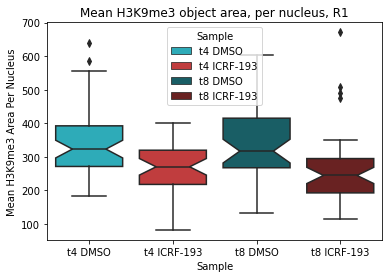

In [103]:
#Plot avg H3K9me3 object area per nucleus, seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo[combo['Replicate'] == 'R1'], x = 'Sample', y = 'Mean_GreenObjects_AreaShape_Area', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'],
            order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'],
            dodge = False
           )
plt.ylabel('Mean H3K9me3 Area Per Nucleus')
plt.title('Mean H3K9me3 object area, per nucleus, R1')
plt.savefig('220228_HetMeanAreaPerNucleus_R1.png', dpi = 300)

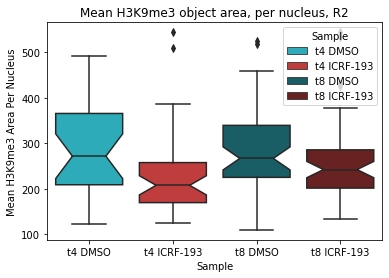

In [104]:
#Plot avg H3K9me3 object area per nucleus, seaborn
cmap = sns.color_palette(['#17BECF','#D62728','#0D6871','#751616'])
sns.boxplot(data = combo[combo['Replicate'] == 'R2'], x = 'Sample', y = 'Mean_GreenObjects_AreaShape_Area', 
            hue = 'Sample', palette = cmap, notch = True,
            hue_order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'],
            order = ['t4 DMSO', 't4 ICRF-193', 't8 DMSO', 't8 ICRF-193'],
            dodge = False
           )
plt.ylabel('Mean H3K9me3 Area Per Nucleus')
plt.title('Mean H3K9me3 object area, per nucleus, R2')
plt.savefig('220228_HetMeanAreaPerNucleus_R2.png', dpi = 300)